<a href="https://colab.research.google.com/github/himansuranjan1/webapp/blob/main/cat_vs_dog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [8]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:46<00:00, 24.4MB/s]
100% 1.06G/1.06G [00:46<00:00, 24.4MB/s]


In [9]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

generators

In [10]:
import keras

In [11]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.


In [12]:
train_ds

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [14]:
ts_ds=keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256, 256),

)

Found 5000 files belonging to 2 classes.


In [15]:

import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [16]:
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
ts_ds = ts_ds.map(process)

In [17]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [19]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [79]:
history = model.fit(train_ds,epochs=10,validation_data=ts_ds)

Epoch 1/10
625/625 [==============================] - 70s 110ms/step - loss: 0.0090 - accuracy: 0.9954 - val_loss: 1.1354 - val_accuracy: 0.8658
Epoch 2/10
625/625 [==============================] - 65s 102ms/step - loss: 0.0082 - accuracy: 0.9977 - val_loss: 1.5410 - val_accuracy: 0.8754
Epoch 3/10
625/625 [==============================] - 66s 104ms/step - loss: 0.0089 - accuracy: 0.9967 - val_loss: 0.9419 - val_accuracy: 0.8518
Epoch 4/10
625/625 [==============================] - 66s 105ms/step - loss: 0.0116 - accuracy: 0.9966 - val_loss: 1.0089 - val_accuracy: 0.8564
Epoch 5/10
625/625 [==============================] - 67s 107ms/step - loss: 0.0095 - accuracy: 0.9963 - val_loss: 0.6530 - val_accuracy: 0.5828
Epoch 6/10
625/625 [==============================] - 68s 108ms/step - loss: 0.0142 - accuracy: 0.9961 - val_loss: 0.7858 - val_accuracy: 0.8556
Epoch 7/10
625/625 [==============================] - 66s 104ms/step - loss: 0.0093 - accuracy: 0.9964 - val_loss: 0.9495 - val_ac

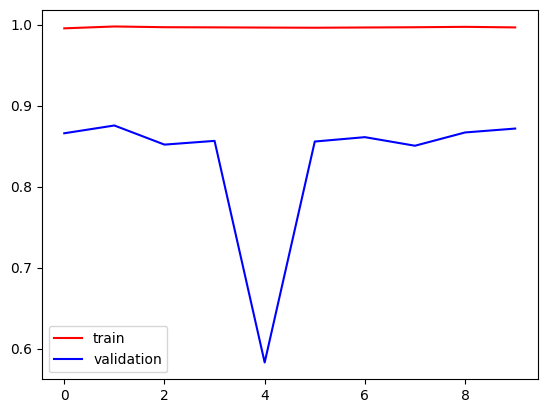

In [80]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

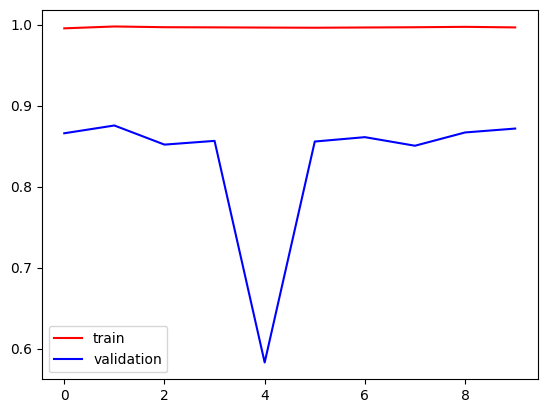

In [81]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

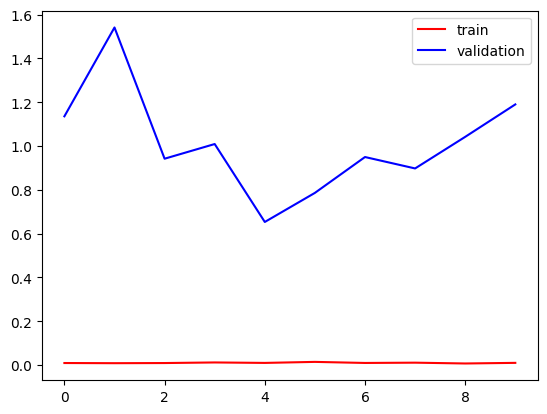

In [82]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [83]:
import cv2

In [90]:
test_img = cv2.imread('/content/dog.jpg')

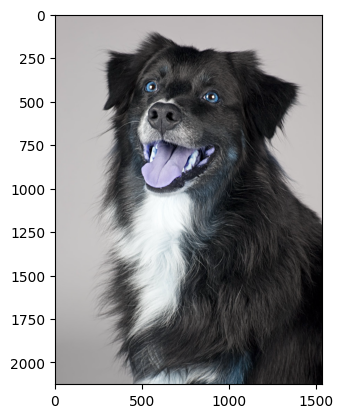

In [91]:
plt.imshow(test_img)

In [92]:
test_img.shape

(2126, 1535, 3)

In [93]:
test_img = cv2.resize(test_img,(256,256))

In [94]:
test_input = test_img.reshape((1,256,256,3))

In [95]:
model.predict(test_input)

1/1 [==============================] - 0s 18ms/step


array([[0.]], dtype=float32)

In [96]:
te_img = cv2.imread('/content/cat.jpg')

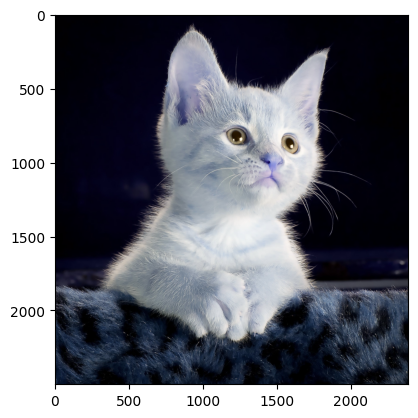

In [98]:
plt.imshow(te_img)

In [99]:
te_img.shape

(2500, 2392, 3)

In [100]:
te_img = cv2.resize(te_img,(256,256))

In [101]:
te_input = te_img.reshape((1,256,256,3))

In [102]:
model.predict(te_input)

1/1 [==============================] - 0s 18ms/step


array([[1.]], dtype=float32)